# 1.获取股票概况

>jqdata是在聚宽官网以及客户端调用数据使用的包，jddatasdk不支持聚源数据

In [5]:
import jqdatasdk as jq
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
#登录
jq.auth('17750593771','17750593771mwy')
#查看当前版本
jq.__version__
#当日剩余可调用条数
jq.get_query_count()

'1.8.7'

{'total': 1000000, 'spare': 1000000}

|交易市场|代码后缀|
|:-:|:-:|
|上海证券交易所|.XSHG|
|深圳证券交易所|.XSHE|
|中金所|.CCFX|
|大商所|.XDCE|
|上期所|.XSGE|
|郑商所|.XZCE|
|上海国际能源期货交易所|.XINE|

# 6.循环、多股票策略

In [7]:
def initialize(context):
    run_daily(period,time='every_bar')
    g.security=['000001.XSHE','000002.XSHE']

def peiode(context):
    for i in g.security:
        order(i,1000)


## 1.获取股票概况

### 获取单支股票信息(get_security_info)

In [6]:
get_security_info('000001.XSHE')#平安银行

000001.XSHE

### 获取所有股票数据(get_all_securities)
get_all_securities(types=['stock','fund','index','etf','lof','fja','fjb'],date)

In [8]:
help(get_all_securities)

Help on function get_all_securities in module jqdatasdk.api:

get_all_securities(types=[], date=None)
    获取平台支持的所有股票、基金、指数、期货信息
    
    :param types list: 用来过滤securities的类型, list元素可选: ‘stock’, ‘fund’, ‘index’, ‘futures’, ‘etf’, ‘lof’, ‘fja’, ‘fjb’. types为空时返回所有股票, 不包括基金,指数和期货
    :param date 日期, 一个字符串或者 datetime.datetime/datetime.date 对象, 用于获取某日期还在上市的股票信息. 默认值为 None, 表示获取所有日期的股票信息
    :return pandas.DataFrame



In [7]:
get_all_securities(types=['stock'],date='2020-4-10')

,display_name,name,start_date,end_date,type
000001.XSHE,平安银行,PAYH,1991-04-03,2200-01-01,stock
000002.XSHE,万科A,WKA,1991-01-29,2200-01-01,stock
000004.XSHE,国农科技,GNKJ,1990-12-01,2200-01-01,stock
000005.XSHE,世纪星源,SJXY,1990-12-10,2200-01-01,stock
000006.XSHE,深振业A,SZYA,1992-04-27,2200-01-01,stock
...,...,...,...,...,...
688388.XSHG,嘉元科技,JYKJ,2019-07-22,2200-01-01,stock
688389.XSHG,普门科技,PMKJ,2019-11-05,2200-01-01,stock
688396.XSHG,华润微,HRW,2020-02-27,2200-01-01,stock
688398.XSHG,赛特新材,STXC,2020-02-11,2200-01-01,stock


### 判断股票是否是ST
get_extras(info='is_st',security_list,start_date,end_date,df=True)

In [15]:
get_extras(info='is_st',security_list=list(stock.index[0:20]),start_date='2020-01-01',end_date='2020-01-17')

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,000012.XSHE,000014.XSHE,000016.XSHE,000017.XSHE,000018.XSHE,000019.XSHE,000020.XSHE,000021.XSHE,000022.XSHE,000023.XSHE
2020-01-02,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2020-01-03,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2020-01-06,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2020-01-07,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2020-01-08,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2020-01-09,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2020-01-10,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2020-01-13,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2020-01-14,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2020-01-15,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


### 获取股票的融资融券信息
get_mtss(security_list,start_date,end_date,fields=None)
fields默认为None，表示取全部字段，各字段含义如下

|字段名|含义|
|:-:|:-:|
|date|日期|
|sec_code|股票日期|
|fin_value|融资余额|
|fin_buy_value|融资买入额|
|fin_refund_value|融资偿还额|
|sec_value|融资余量|
|sec_sell_value|融资卖出量|
|sec_refund_value|融资偿还股|
|fin_sec_value|融资融券余额|

In [19]:
get_mtss(security_list='000001.XSHE',start_date='2020-01-01',end_date='2020-01-05')

,date,sec_code,fin_value,fin_buy_value,fin_refund_value,sec_value,sec_sell_value,sec_refund_value,fin_sec_value
0,2020-01-02,000001.XSHE,3.475769e+09,272825035.0,285237966.0,1827136.0,410240.0,106378.0,3.506593e+09
1,2020-01-03,000001.XSHE,3.431823e+09,185087645.0,229033330.0,2147496.0,518500.0,198140.0,3.468717e+09


## 股票分类信息

### 获取指数成分股
get_index_stocks(index_symbol,date=None)

In [32]:
index=get_all_securities(types='index',date='2020-01-01')
index.head()
component=get_index_stocks(index_symbol='000001.XSHG',date='2020-01-01')
component[0:10]
get_security_info(code=component[0],date='2020-01-01')

,display_name,name,start_date,end_date,type
000001.XSHG,上证指数,SZZS,1991-07-15,2200-01-01,index
000002.XSHG,A股指数,AGZS,1992-02-21,2200-01-01,index
000003.XSHG,B股指数,BGZS,1992-02-21,2200-01-01,index
000004.XSHG,工业指数,GYZS,1993-05-03,2200-01-01,index
000005.XSHG,商业指数,SYZS,1993-05-03,2200-01-01,index


['600000.XSHG',
 '600004.XSHG',
 '600006.XSHG',
 '600007.XSHG',
 '600008.XSHG',
 '600009.XSHG',
 '600010.XSHG',
 '600011.XSHG',
 '600012.XSHG',
 '600015.XSHG']

600000.XSHG

### 获取行业、概念成分股
>获取在给定日期一个行业或者概念板块的所有股票，行业分类见[行业概念数据](https://www.joinquant.com/data/dict/plateData)

获取行业板块成份股(返回List)
get_industry_stocks(industry_code,date=None)
获取概念板块成分股
get_concept_stocks(concept_code,date=None)

In [37]:
get_industry_stocks(industry_code='A01',date='2020-01-01')

['000998.XSHE',
 '002041.XSHE',
 '002772.XSHE',
 '300087.XSHE',
 '300189.XSHE',
 '300511.XSHE',
 '600108.XSHG',
 '600313.XSHG',
 '600354.XSHG',
 '600359.XSHG',
 '600371.XSHG',
 '600506.XSHG',
 '600540.XSHG',
 '600598.XSHG',
 '600672.XSHG',
 '600762.XSHG',
 '601118.XSHG']

In [36]:
get_concept_stocks(concept_code='GN001',date='2020-01-01')

['000027.XSHE',
 '000046.XSHE',
 '000416.XSHE',
 '000531.XSHE',
 '000540.XSHE',
 '000541.XSHE',
 '000623.XSHE',
 '000628.XSHE',
 '000652.XSHE',
 '000828.XSHE',
 '000850.XSHE',
 '000936.XSHE',
 '002090.XSHE',
 '002357.XSHE',
 '002608.XSHE',
 '002822.XSHE',
 '600095.XSHG',
 '600120.XSHG',
 '600128.XSHG',
 '600155.XSHG',
 '600191.XSHG',
 '600249.XSHG',
 '600272.XSHG',
 '600284.XSHG',
 '600310.XSHG',
 '600331.XSHG',
 '600361.XSHG',
 '600439.XSHG',
 '600496.XSHG',
 '600533.XSHG',
 '600638.XSHG',
 '600643.XSHG',
 '600739.XSHG',
 '600795.XSHG',
 '600811.XSHG',
 '600826.XSHG',
 '600864.XSHG',
 '600881.XSHG',
 '600884.XSHG',
 '601216.XSHG',
 '601880.XSHG',
 '601999.XSHG']

### 查询股票所属行业
get_industry(security,date=None)

In [39]:
get_industry('000001.XSHE')

{'000001.XSHE': {'jq_l1': {'industry_code': 'HY007', 'industry_name': '金融指数'},
  'jq_l2': {'industry_code': 'HY493', 'industry_name': '多元化银行指数'},
  'sw_l1': {'industry_code': '801780', 'industry_name': '银行I'},
  'sw_l2': {'industry_code': '801192', 'industry_name': '银行II'},
  'sw_l3': {'industry_code': '851911', 'industry_name': '银行III'},
  'zjw': {'industry_code': 'J66', 'industry_name': '货币金融服务'}}}

In [40]:
get_industry('000002.XSHE')

{'000002.XSHE': {'jq_l1': {'industry_code': 'HY011', 'industry_name': '房地产指数'},
  'jq_l2': {'industry_code': 'HY509', 'industry_name': '房地产开发指数'},
  'sw_l1': {'industry_code': '801180', 'industry_name': '房地产I'},
  'sw_l2': {'industry_code': '801181', 'industry_name': '房地产开发II'},
  'sw_l3': {'industry_code': '851811', 'industry_name': '房地产开发III'},
  'zjw': {'industry_code': 'K70', 'industry_name': '房地产业'}}}

## 获取行情数据

### 历史行情数据
get_price(security,start_date,end_date,frequency='daily',fields=None,skip_paused=False,fq='pre',panel=True)

,open,close,high,low,volume,money
2020-01-02,32.80,32.56,33.60,32.51,101213040.0,3.342374e+09
2020-01-03,32.71,32.05,32.81,31.78,80553629.0,2.584310e+09
2020-01-06,31.75,31.51,31.76,31.25,87684058.0,2.761449e+09
2020-01-07,31.61,31.76,31.93,31.35,57793343.0,1.827511e+09
2020-01-08,31.30,31.68,31.77,31.05,52999684.0,1.667144e+09


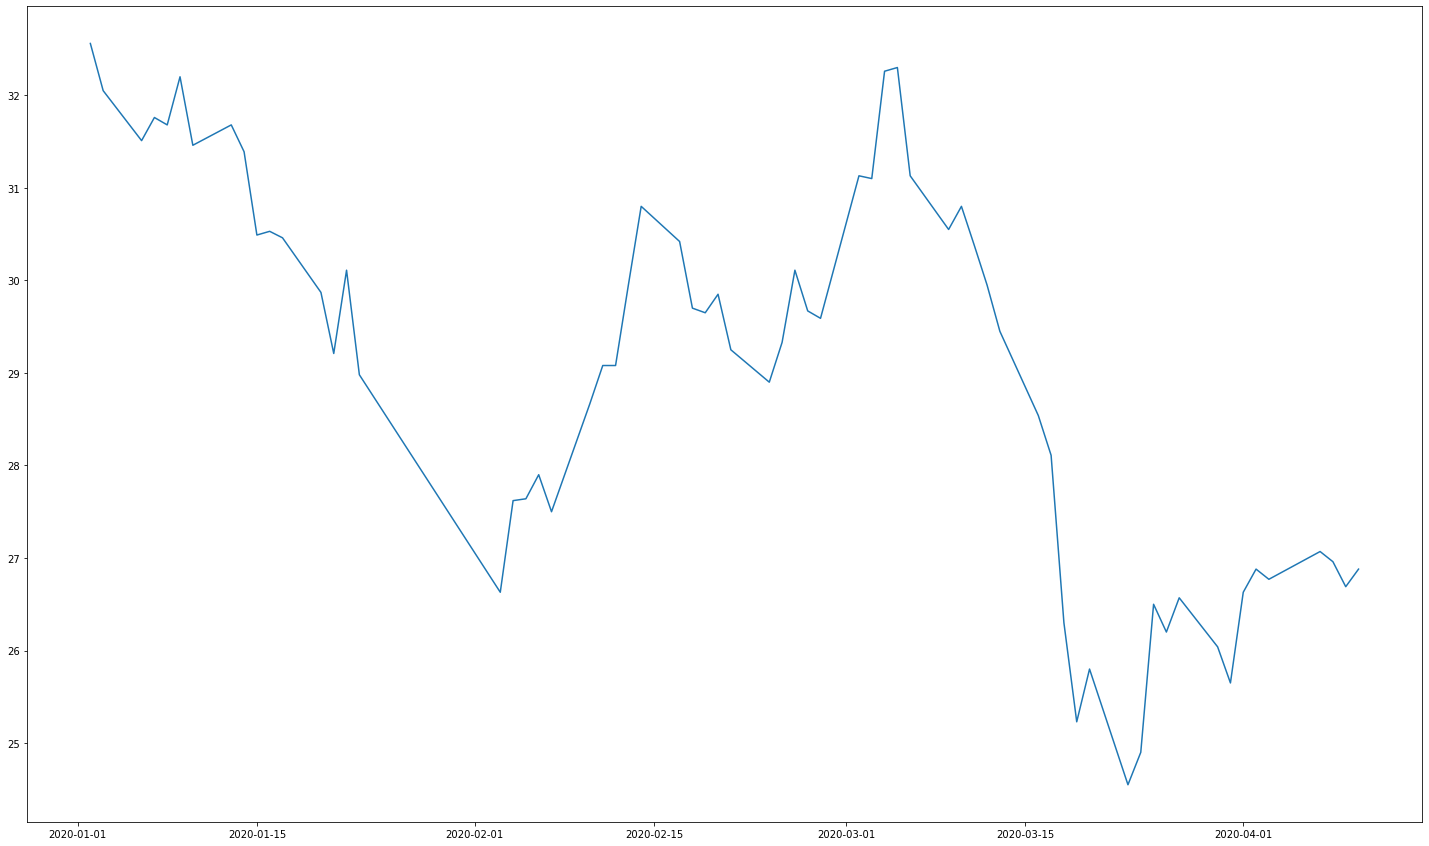

In [47]:
wanke=get_price(security='000002.XSHE',start_date='2020-01-01',end_date='2020-04-10')
wanke.head()
x,y=plt.subplots(1)
x.set_size_inches(w=25,h=15)
y.plot(wanke['close'])

### 当前单位的行情数据
<br>
get_current_data(security_list=None)
<br>
- high_limit:涨停价
- low_limit:跌停价
- paused:是否停牌
- is_st:是否st股票

In [53]:
get_current_data(security_list=['000001.XSHE','000002.XSHE'])#这个好像只能在聚宽中使用

NameError: name 'get_current_data' is not defined

### tick数据(这是付费模块)
>股票部分支持2017-01-01至今的数据，提供五档数据
get_ticks(security,end_dt,start_dt=None,count=None,field=['time','current','high','low','volumn','money'])

In [56]:
get_ticks('000001.XSHE',start_dt='2020-01-01',end_dt='2020-01-20')

Exception: get_ticks(沪深A股行情tick数据) 属于付费模块，如需购买正式权限请联系JQData管理员，微信号：JQData02

# 5.context中的数据与条件判断

![context的结构](https://image.joinquant.com/3f21926604474d702db5efe2c9154cb1)

In [ ]:
#1.order(security,amount)
order('000001.XSHE',100)#买入100股平安银行
#2.order_target(securiyt,amount)通过买卖将仓位调整至一定数量
order('000003.XSHE',1000)
#3.order_value(securiyt,value)买入一定价值的股票

#4.order_target_value(security,value)


In [ ]:
#打印可用资金
print(context.portfolio,available_cash)
#打印运行频率
print(context.run_params.frequency)
#打印当前单位的开始时间
print(context.current_dt)